In [1]:
import mne
import math
import numpy as np
import pandas as pd
import datasets as ds
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sample_raw = mne.io.read_raw_edf('../files/S001/S001R03.edf')

Extracting EDF parameters from C:\Users\joshu\Documents\Github\eeg_ml\files\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
print(sample_raw.info)
print(sample_raw.ch_names)
print(sample_raw.n_times)
print(sample_raw.times)

<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>
['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
20000
[0.0000000e+00 6.2500000e-03 1.2500000e-02 ... 1.2498125e+02 1.2498750e+02
 1.2499375e+02]


In [4]:
data, times = sample_raw[:]
ch_names = sample_raw.ch_names

In [5]:
print(data.shape)
print(type(data))
print(data)
print(times.shape)
print(type(times))
print(times)
print(type(times[0]))
print(type(data[0][0]))

(64, 20000)
<class 'numpy.ndarray'>
[[-5.70e-05 -4.90e-05 -5.50e-05 ...  0.00e+00  0.00e+00  0.00e+00]
 [-1.30e-05 -1.10e-05 -1.70e-05 ...  0.00e+00  0.00e+00  0.00e+00]
 [-1.50e-05 -1.00e-05 -1.60e-05 ...  0.00e+00  0.00e+00  0.00e+00]
 ...
 [-5.60e-05 -7.00e-05 -7.70e-05 ...  0.00e+00  0.00e+00  0.00e+00]
 [-1.24e-04 -1.49e-04 -1.53e-04 ...  0.00e+00  0.00e+00  0.00e+00]
 [-2.80e-05 -4.00e-05 -3.70e-05 ...  0.00e+00  0.00e+00  0.00e+00]]
(20000,)
<class 'numpy.ndarray'>
[0.0000000e+00 6.2500000e-03 1.2500000e-02 ... 1.2498125e+02 1.2498750e+02
 1.2499375e+02]
<class 'numpy.float64'>
<class 'numpy.float64'>


In [6]:
montage = sample_raw.get_montage()
print(mne.channels.get_builtin_montages())

['standard_1005', 'standard_1020', 'standard_alphabetic', 'standard_postfixed', 'standard_prefixed', 'standard_primed', 'biosemi16', 'biosemi32', 'biosemi64', 'biosemi128', 'biosemi160', 'biosemi256', 'easycap-M1', 'easycap-M10', 'easycap-M43', 'EGI_256', 'GSN-HydroCel-32', 'GSN-HydroCel-64_1.0', 'GSN-HydroCel-65_1.0', 'GSN-HydroCel-128', 'GSN-HydroCel-129', 'GSN-HydroCel-256', 'GSN-HydroCel-257', 'mgh60', 'mgh70', 'artinis-octamon', 'artinis-brite23', 'brainproducts-RNP-BA-128']


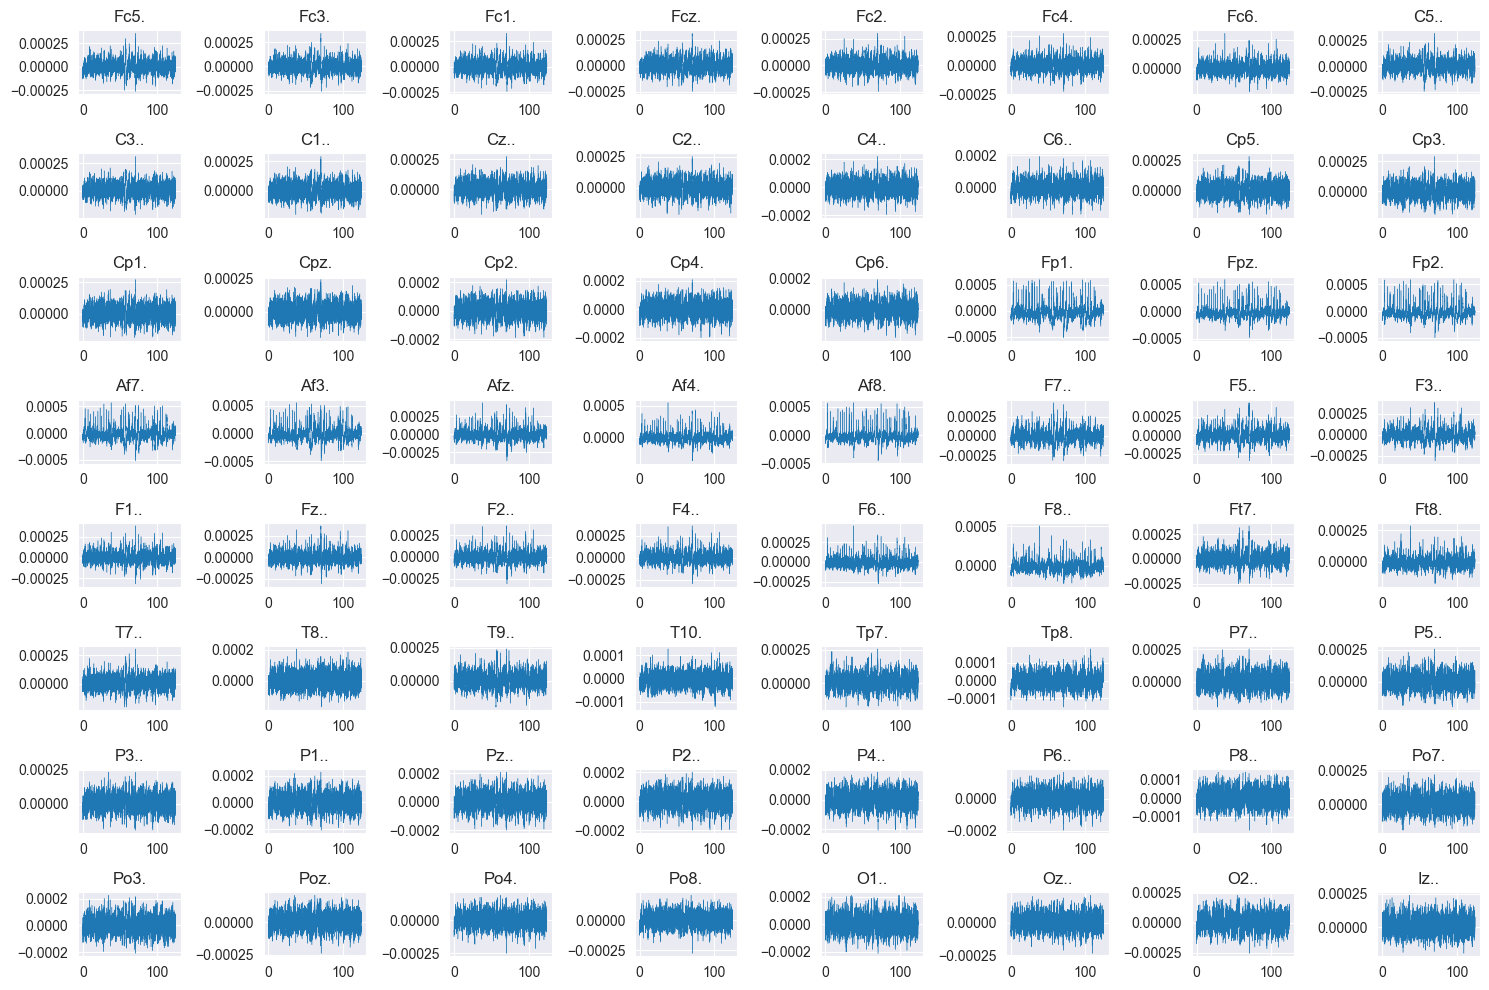

In [7]:
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(15, 10))
for i in range(8):
    for j in range(8):
        axs[i,j].plot(times, data[i*8+j], linewidth=0.3)
        axs[i,j].set_title(ch_names[i*8+j])
fig.tight_layout()
plt.savefig('../channels.png')
plt.show()
plt.close()

In [8]:
# TODO: Check if Time difference is always 0.00625
sample_df = sample_raw.to_data_frame()
sample_df = sample_df.loc[(sample_df!=0.0).all(axis=1)]
display(sample_df)

,time,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
1,0.00625,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,...,-55.0,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0
2,0.01250,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,...,-54.0,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0
3,0.01875,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,...,-65.0,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0
4,0.02500,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,...,-75.0,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0
5,0.03125,-76.0,-40.0,-48.0,-55.0,-60.0,-61.0,-91.0,-83.0,-59.0,...,-59.0,-95.0,-94.0,-110.0,-108.0,-100.0,-97.0,-95.0,-175.0,-54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,124.46250,68.0,51.0,47.0,36.0,31.0,14.0,3.0,53.0,51.0,...,-8.0,67.0,61.0,49.0,18.0,8.0,90.0,77.0,77.0,27.0
19915,124.46875,23.0,16.0,14.0,10.0,10.0,2.0,17.0,23.0,24.0,...,13.0,58.0,53.0,56.0,42.0,46.0,76.0,68.0,86.0,32.0
19917,124.48125,23.0,14.0,11.0,3.0,5.0,-3.0,1.0,21.0,19.0,...,44.0,24.0,24.0,66.0,74.0,85.0,62.0,97.0,156.0,75.0
19918,124.48750,38.0,27.0,28.0,19.0,19.0,12.0,9.0,34.0,32.0,...,25.0,5.0,11.0,53.0,51.0,43.0,44.0,81.0,140.0,66.0


Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\joshu\AppData\Local\Temp\ipykernel_9148\3025295173.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  s001_r01_psd.plot(amplitude=False)
C:\Users\joshu\miniconda3\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


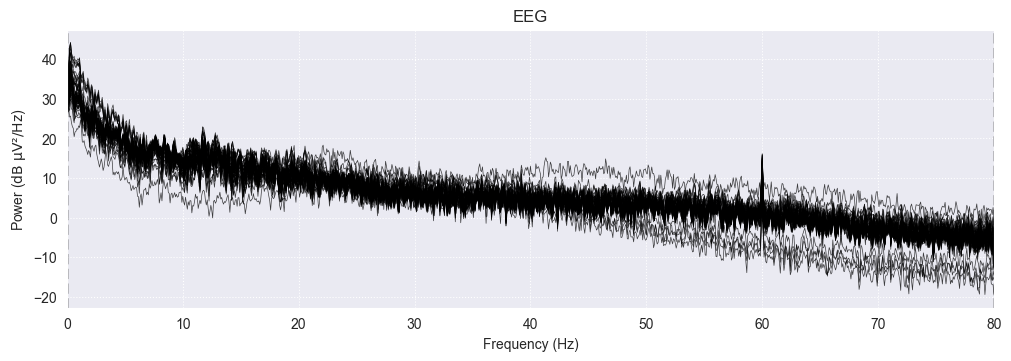

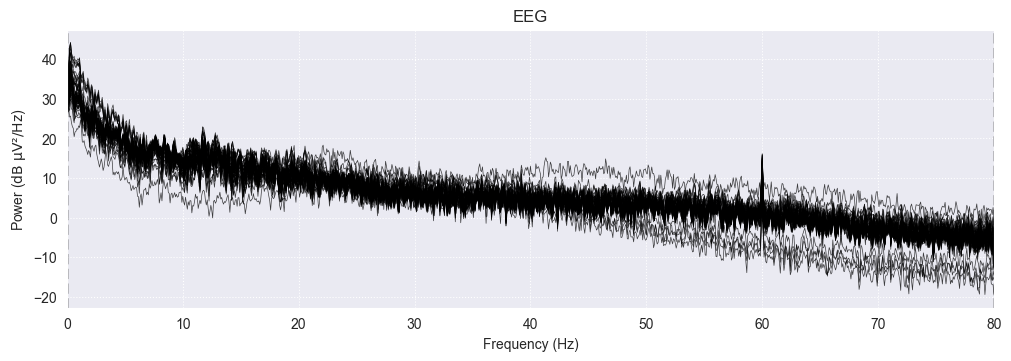

In [9]:
s001_r01_psd = sample_raw.compute_psd()
s001_r01_psd.plot(amplitude=False)

       Fc5.  Fc3.  Fc1.  Fcz.  Fc2.  Fc4.  Fc6.  C5..  C3..  C1..  ...  P8..  \
1      49.0  11.0  10.0  12.0  19.0  24.0  58.0  51.0  19.0  23.0  ...  55.0   
2      55.0  17.0  16.0  19.0  24.0  29.0  66.0  61.0  30.0  36.0  ...  54.0   
3      73.0  42.0  40.0  37.0  37.0  40.0  71.0  78.0  53.0  53.0  ...  65.0   
4      87.0  53.0  52.0  51.0  45.0  43.0  71.0  87.0  65.0  64.0  ...  75.0   
5      76.0  40.0  48.0  55.0  60.0  61.0  91.0  83.0  59.0  62.0  ...  59.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
19914  68.0  51.0  47.0  36.0  31.0  14.0   3.0  53.0  51.0  54.0  ...   8.0   
19915  23.0  16.0  14.0  10.0  10.0   2.0  17.0  23.0  24.0  24.0  ...  13.0   
19917  23.0  14.0  11.0   3.0   5.0   3.0   1.0  21.0  19.0  25.0  ...  44.0   
19918  38.0  27.0  28.0  19.0  19.0  12.0   9.0  34.0  32.0  40.0  ...  25.0   
19919  50.0  35.0  41.0  40.0  33.0  26.0  20.0  26.0  29.0  38.0  ...   2.0   

       Po7.  Po3.   Poz.   Po4.   Po8. 

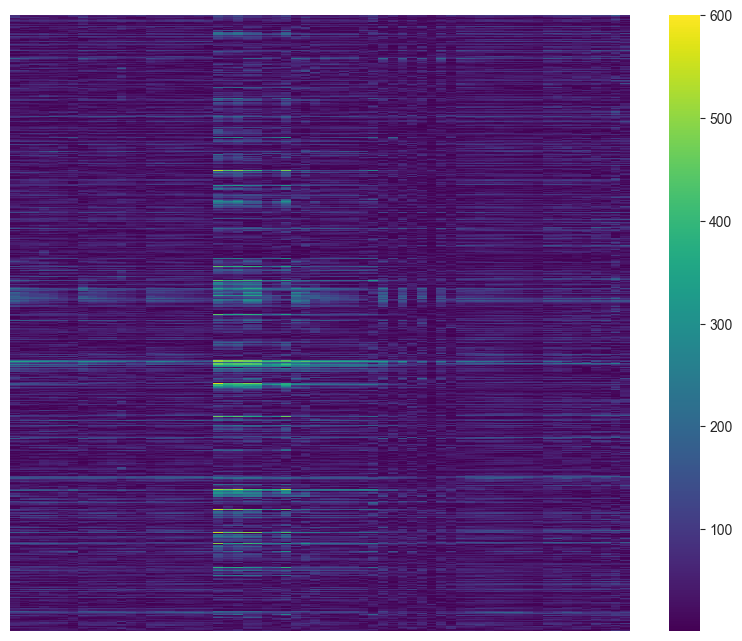

In [10]:
plt.figure(figsize=(10, 8))
df_values = sample_df.loc[:, sample_df.columns != 'time'].abs()
print(df_values)
sns.heatmap(df_values, annot=False, fmt=".2f", cmap="viridis", xticklabels=False, yticklabels=False)
plt.savefig('../heatmap_1.png')
plt.show()
plt.close()